# Exploration

In [18]:
#import stuff we will need
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from prep import remove_outlier,clean_zillow, train_validate_test, get_object_cols, get_numeric_X_cols, min_max_scale
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#import functions from my .py files
from acquire import new_zillow, get_zillow_data

In [19]:
df = get_zillow_data()

In [20]:
df = clean_zillow(df)

In [21]:
df

sqft  baths  beds  tax_value    fips    age
parcel_id                                               
14634203   1125.0    2.0   3.0   289445.0  6059.0   43.0
11721753   1316.0    2.0   3.0   205123.0  6037.0   94.0
11289917   1458.0    2.0   3.0   136104.0  6037.0   47.0
11637029   1766.0    2.0   3.0   810694.0  6037.0   37.0
11705026   1421.0    1.0   2.0    35606.0  6037.0  106.0
...           ...    ...   ...        ...     ...    ...
14453399   3015.0    3.0   5.0   852813.0  6059.0   15.0
12019061    769.0    2.0   1.0   492395.0  6037.0   53.0
11570288   1212.0    2.0   2.0   600608.0  6037.0   48.0
11128688   2992.0    3.0   5.0  1120000.0  6037.0   40.0
10713993   1574.0    3.0   3.0   563463.0  6037.0   66.0

[38475 rows x 6 columns]

In [31]:
#let's split our data using my train_validate_test function, and check our train, validate, and test shapes. Our target is tax_value.
target = 'tax_value'
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, target)
train.shape, validate.shape, test.shape

((21546, 6), (9234, 6), (7695, 6))

In [32]:
#let's scale our data using the min_max_scale function. Not scaling the target. 
#since I used z-score to weed out outliers, this should work fine.
obj_cols = get_object_cols(df)
num_cols = get_numeric_X_cols(X_train, obj_cols)
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, num_cols)

Text(0.5, 1.0, 'Scaled')

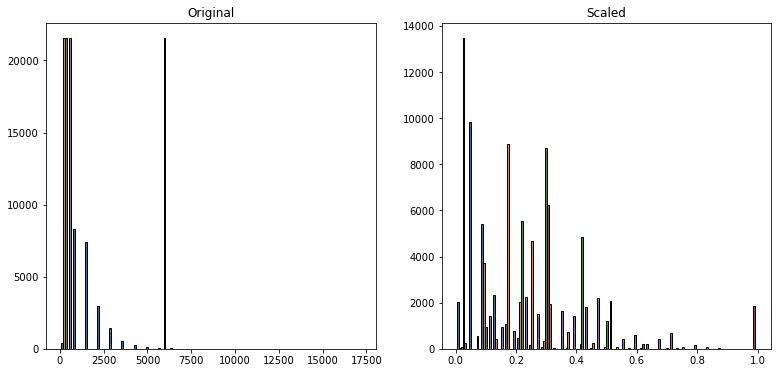

In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_validate_scaled = scaler.transform(X_validate)
x_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

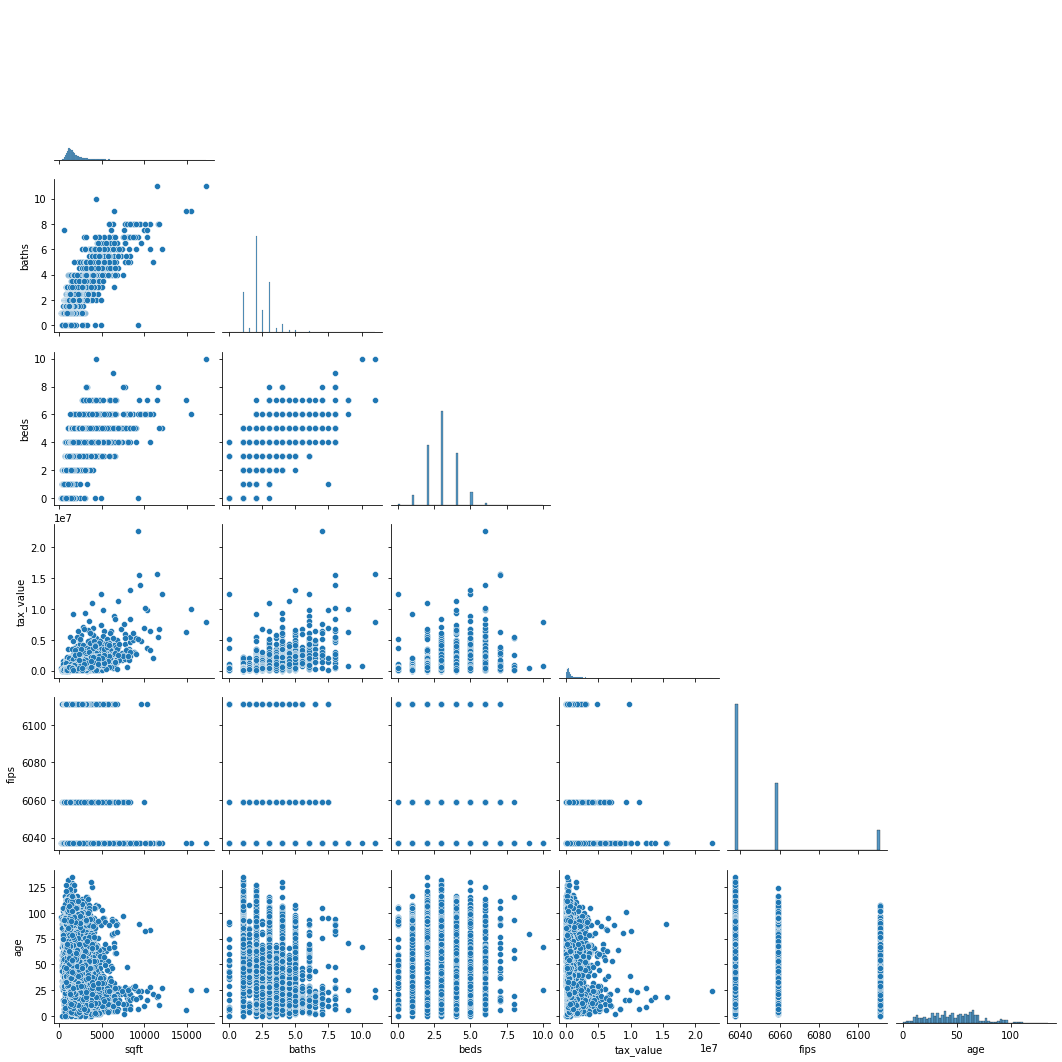

In [37]:
sns.pairplot(train[['sqft', 'baths', 'beds', 'tax_value','fips','age']], corner=True)
plt.show()